In [504]:
# data handling
import pandas as pd
import numpy as np

# data vis
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import machine learning stuff
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing as pre
from sklearn import metrics

In [505]:
# Set-up default visualization parameters:
context_dict = {
    'axes.titlesize':18,
    'axes.labelsize':16,
}

mpl.rcParams['figure.figsize'] = (12, 8)
sns.set_context("paper", rc=context_dict)
sns.set_style("whitegrid")

In [533]:
train_df = pd.read_csv('data/train.csv', index_col='PassengerId')
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# Round 1: Minimal Features
Let's see what we get out of a Logistic Regression model with just the most obvious features included. 

In [507]:
X = train_df.drop(['Survived'], axis = 1)
Y = train_df.Survived

In [538]:
# Convert categorical data to numbers and standardize continuous data:
cat = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
cont = ['Age', 'Fare']

#categorical
train_df['Pclass'], int2class_pclass = pd.factorize(train_df['Pclass'])
train_df['Sex'], int2class_sex = pd.factorize(train_df['Sex'])
train_df['Embarked'], int2class_emb = pd.factorize(train_df['Embarked'])
train_df['SibSp'], int2class = pd.factorize(train_df['SibSp'])
train_df['Parch'], int2class = pd.factorize(train_df['Parch'])

#continuous
train_df[cont] = pre.scale(train_df[cont], copy=False)

train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,0,"Braund, Mr. Owen Harris",0,-0.530377,0,0,A/5 21171,-0.502445,NaN,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.571831,0,0,PC 17599,0.786845,C85,1,1
3,1,0,"Heikkinen, Miss. Laina",1,-0.254825,1,0,STON/O2. 3101282,-0.488854,NaN,0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.365167,0,0,113803,0.420730,C123,0,1
5,0,0,"Allen, Mr. William Henry",0,0.365167,1,0,373450,-0.486337,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,-0.185937,1,0,211536,-0.386671,NaN,0,5
888,1,1,"Graham, Miss. Margaret Edith",1,-0.737041,1,0,112053,-0.044381,B42,0,2
889,0,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,0,2,W./C. 6607,-0.176263,NaN,0,2


In [509]:
# Check for missing data:
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,0,"Braund, Mr. Owen Harris",0,-0.530377,0,0,A/5 21171,-0.502445,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.571831,0,0,PC 17599,0.786845,C85,1
3,1,0,"Heikkinen, Miss. Laina",1,-0.254825,1,0,STON/O2. 3101282,-0.488854,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.365167,0,0,113803,0.420730,C123,0
5,0,0,"Allen, Mr. William Henry",0,0.365167,1,0,373450,-0.486337,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,-0.185937,1,0,211536,-0.386671,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",1,-0.737041,1,0,112053,-0.044381,B42,0
889,0,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,0,2,W./C. 6607,-0.176263,NaN,0


In [510]:
# Looks like there is some missing data. Let's fill it in with the average:
train_df.loc[train_df.Age.isnull(), 'Age'] = train1_df.Age.mean()

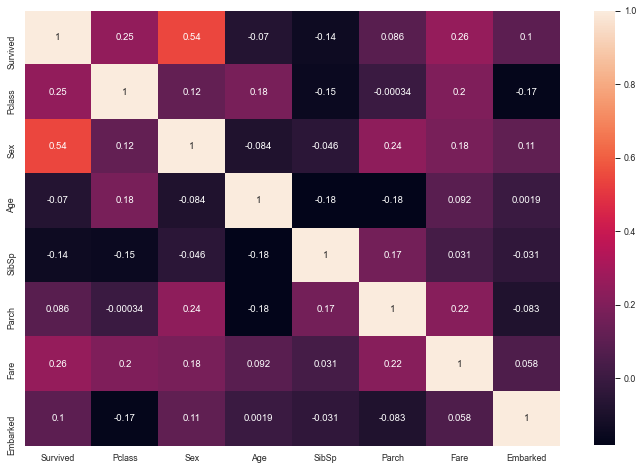

In [511]:
# let's take a look at the correlation matrix as a heatmap. Very handy:
sns.heatmap(train_df.corr(), annot=True)

In [512]:
#Split data into train/validate/test:
np.random.seed(333)

X = train_df.drop(['Survived'], axis=1)
Y = train_df.Survived

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.2)

# drop categories we don't want for round 1:
x_train = x_train.drop(['Embarked', 'Name', 'Ticket', 'Cabin'], axis=1)
x_valid = x_valid.drop(['Embarked', 'Name', 'Ticket', 'Cabin'], axis=1)

x_train.sort_values(by='PassengerId').head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,0,-5.303766e-01,0,0,-0.502445
2,1,1,5.718310e-01,0,0,0.786845
3,0,1,-2.548247e-01,1,0,-0.488854
5,0,0,3.651671e-01,1,0,-0.486337
7,1,0,1.674039e+00,1,0,0.395814
11,0,1,-1.770360e+00,0,1,-0.312172
12,1,1,1.949591e+00,1,0,-0.113846
14,0,0,6.407190e-01,0,3,-0.018709
15,0,1,-1.081480e+00,1,0,-0.490280


### A couple of helper functions:

We are going to write a couple of functions that will help us collect and nicely print performance metrics of our various iterations. Then we will evaluate our models round 1 performance, and add it to a dictionary for later comparison to other attempts.

In [513]:
# A function for tracking the performance of different models:
def evaluate(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)
    eval_dict = metrics.classification_report(y_valid, y_pred, 
                                              labels=[0,1], 
                                              target_names=['Died', 'Survived'],
                                              output_dict=True)
    prob_array = model.predict_proba(x_valid)
    
    fpr, tpr, huh = metrics.roc_curve(y_valid, model.predict_proba(x_valid)[:,1])
    auc = metrics.auc(fpr, tpr)
    eval_dict['AUC'] = auc
    eval_dict['Classifier'] = model
    
    return eval_dict

# a function to pretty print our dictionary of metrics:
def pprint(web, level=0):
    for k,v in web.items():
        if isinstance(v, dict):
            print('\t'*level, f'{k}: ')
            level += 1
            pprint(v, level)
            level -= 1
        else:
            print('\t'*level, k, ": ", v)

In [514]:
models = {}
models['Logistic Regression 1'] = evaluate(linear_model.LogisticRegression())
models['Logistic Regression 1']['Notes'] = \
" Minimal Features. No resampling to address class imbalance. No hyper-parameter tuning."

In [515]:
pprint(models)

 Logistic Regression 1: 
	 Died: 
		 precision :  0.8085106382978723
		 recall :  0.8636363636363636
		 f1-score :  0.8351648351648351
		 support :  88
	 Survived: 
		 precision :  0.7551020408163265
		 recall :  0.6727272727272727
		 f1-score :  0.7115384615384616
		 support :  55
	 accuracy :  0.7902097902097902
	 macro avg: 
		 precision :  0.7818063395570993
		 recall :  0.7681818181818182
		 f1-score :  0.7733516483516483
		 support :  143
	 weighted avg: 
		 precision :  0.7879688700357393
		 recall :  0.7902097902097902
		 f1-score :  0.7876162299239222
		 support :  143
	 AUC :  0.8022727272727272
	 Classifier :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
	 Notes :   Minimal Features. No resampling t

## Round 1 Performance:

In our first round,here are the scores of our major metrics:

    accuracy :  0.7902097902097902
    macro avg: 
         precision :  0.7818063395570993
         recall :  0.7681818181818182
        f1-score :  0.7733516483516483

# Round 2: Addressing Survival Class Imbalance:
Let's take a look at our survival classes:

In [516]:
y_train.value_counts()

0    352
1    217
Name: Survived, dtype: int64

As we can see, passenger death accounts for 61 percent of the classifications. This can cause our model to be biased in that direction. Let's try to address this imbalance with random over-sampling:

In [517]:
# Join training data together to resample as a whole:
xidxs = x_train.index
yidxs = y_train.index
osample_df = pd.concat([x_train, y_train], axis = 1)
osample_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
294,0,1,-3.926007e-01,1,0,-0.470230,0
426,0,0,2.392400e-16,1,0,-0.502445,0
499,1,1,-3.237127e-01,0,2,2.402990,0
91,0,0,-4.816080e-02,1,0,-0.486337,0
227,2,0,-7.370406e-01,1,0,-0.437007,1
...,...,...,...,...,...,...,...
147,0,0,-1.859368e-01,1,0,-0.491456,1
762,0,0,7.784949e-01,1,0,-0.504962,0
835,0,0,-8.059285e-01,1,0,-0.481304,0


In [518]:
df_lived = osample_df[osample_df.Survived == 1]
df_died = osample_df[osample_df.Survived == 0]

# get counts of survivals
died, lived = osample_df.Survived.value_counts()
died, lived

(352, 217)

In [519]:
# we want to oversample the minority class, which is "survived"
df_lived = df_lived.sample(died, replace=True, random_state=333)

In [520]:
# get the training data back now that it is evenly distributed:
osample_df = pd.concat([df_lived, df_died])
x_train = osample_df.drop(['Survived'], axis=1)
y_train = osample_df.Survived

In [521]:
# show even distribution of survival class
y_train.value_counts()

1    352
0    352
Name: Survived, dtype: int64

In [522]:
x_train.sort_values(by="PassengerId").head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,0,-0.530377,0,0,-0.502445
2,1,1,0.571831,0,0,0.786845
3,0,1,-0.254825,1,0,-0.488854
5,0,0,0.365167,1,0,-0.486337
7,1,0,1.674039,1,0,0.395814
11,0,1,-1.770360,0,1,-0.312172
11,0,1,-1.770360,0,1,-0.312172
12,1,1,1.949591,1,0,-0.113846
14,0,0,0.640719,0,3,-0.018709


We can see the results of our oversampling in the duplicate passenger ID 11. We can also check to see if there is an even distribution of Survived classes:

Now, let's split our data back into independent and dependent variables, train a new model and see how it does:

In [523]:
models['Logistic Regression 2'] = evaluate(linear_model.LogisticRegression())
models['Logistic Regression 2']['Notes'] = "Minimal Features. Over-sampled to address Surivival class imbalance. No Tuning"
pprint(models)

 Logistic Regression 1: 
	 Died: 
		 precision :  0.8085106382978723
		 recall :  0.8636363636363636
		 f1-score :  0.8351648351648351
		 support :  88
	 Survived: 
		 precision :  0.7551020408163265
		 recall :  0.6727272727272727
		 f1-score :  0.7115384615384616
		 support :  55
	 accuracy :  0.7902097902097902
	 macro avg: 
		 precision :  0.7818063395570993
		 recall :  0.7681818181818182
		 f1-score :  0.7733516483516483
		 support :  143
	 weighted avg: 
		 precision :  0.7879688700357393
		 recall :  0.7902097902097902
		 f1-score :  0.7876162299239222
		 support :  143
	 AUC :  0.8022727272727272
	 Classifier :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
	 Notes :   Minimal Features. No resampling t

## Round 2 Performance:

In almost all metrics we our score went down by several points. 

Since over-sampling did not help us out, we need go back up to the initial train/test split cells and start from scratch. 

# Round 3: Feature Engineering part 1:
In this part we will focus on leaving everything about the preprocessing the same (like filling in missing age data with the average), while adding a single feature: passenger titles.

In [524]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,0,"Braund, Mr. Owen Harris",0,-5.303766e-01,0,0,A/5 21171,-0.502445,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.718310e-01,0,0,PC 17599,0.786845,C85,1
3,1,0,"Heikkinen, Miss. Laina",1,-2.548247e-01,1,0,STON/O2. 3101282,-0.488854,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.651671e-01,0,0,113803,0.420730,C123,0
5,0,0,"Allen, Mr. William Henry",0,3.651671e-01,1,0,373450,-0.486337,NaN,0
6,0,0,"Moran, Mr. James",0,2.392400e-16,1,0,330877,-0.478116,NaN,2
7,0,1,"McCarthy, Mr. Timothy J",0,1.674039e+00,1,0,17463,0.395814,E46,0
8,0,0,"Palsson, Master. Gosta Leonard",0,-1.908136e+00,2,1,349909,-0.224083,NaN,0
9,1,0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,-1.859368e-01,1,2,347742,-0.424256,NaN,0


In [534]:
train_df['Title'] = train_df.Name.str.extract(r'([a-zA-Z]+)\.')
train_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Countess      1
Capt          1
Jonkheer      1
Don           1
Sir           1
Lady          1
Mme           1
Name: Title, dtype: int64


__Summary of Titles__

There are a few French titles in the above list, so we can map them back to their English equivalents. Additionally, "Jonkheer", "Sir", "Lady" and "Countess" are all terms for nobility. We will distill them down to "Lord" and "Lady" only. Finally, there are a few professional titles such as "Dr", "Col", and "Capt". These are more than likely held by men of roughly the same age and social status, so I'm going to combine them too. 

In [535]:
title_dict = {
    'Mrs': 'Mrs', 'Lady': 'Lady', 'Countess': 'Lady',
    'Jonkheer': 'Lord', 'Col': 'Officer', 'Rev': 'Rev',
    'Miss': 'Miss', 'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss', 'Dona': 'Lady',
    'Mr': 'Mr', 'Dr': 'Officer', 'Major': 'Officer', 'Capt': 'Officer', 'Sir': 'Lord', 'Don': 'Lord', 'Master': 'Master'
}

train_df.Title = train_df.Title.map(title_dict)

In [536]:
train_df.Title.value_counts()

Mr         517
Miss       185
Mrs        126
Master      40
Officer     12
Rev          6
Lord         3
Lady         2
Name: Title, dtype: int64

Let's again address the missing age data by filling in the average. Round 4 will involve trying a different tactic than using the mean.

Let's again separate our data into testing and training with the same proportions as before:

In [537]:
# The rest of the categorical data is factorized to numbers from round 2. We just need to factorize our new Title data:
train_df.Title, int2class_title = pd.factorize(train_df.Title)

In [540]:
# Split data again. We should get the same split as last time by using the same random seed:
np.random.seed(333)

X = train_df.drop(['Survived'], axis=1)
Y = train_df.Survived

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.2)

x_train.sort_values(by='PassengerId').head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",0,-0.530377,0,0,A/5 21171,-0.502445,NaN,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.571831,0,0,PC 17599,0.786845,C85,1,1
3,0,"Heikkinen, Miss. Laina",1,-0.254825,1,0,STON/O2. 3101282,-0.488854,NaN,0,2
5,0,"Allen, Mr. William Henry",0,0.365167,1,0,373450,-0.486337,NaN,0,0
7,1,"McCarthy, Mr. Timothy J",0,1.674039,1,0,17463,0.395814,E46,0,0
11,0,"Sandstrom, Miss. Marguerite Rut",1,-1.770360,0,1,PP 9549,-0.312172,G6,0,2
12,1,"Bonnell, Miss. Elizabeth",1,1.949591,1,0,113783,-0.113846,C103,0,2
14,0,"Andersson, Mr. Anders Johan",0,0.640719,0,3,347082,-0.018709,NaN,0,0
15,0,"Vestrom, Miss. Hulda Amanda Adolfina",1,-1.081480,1,0,350406,-0.490280,NaN,0,2


In [541]:
# drop name, cabin, ticket and embarked
for item in ('Cabin', 'Ticket', 'Embarked', 'Name'):
    x_train = x_train.drop([item], axis=1)
    x_test = x_test.drop([item], axis=1)
    x_valid = x_valid.drop([item], axis=1)

# see if classes were droped:
x_train 

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
PassengerId,,,,,,,
294,0,1,-0.392601,1,0,-0.470230,2
426,0,0,NaN,1,0,-0.502445,0
499,1,1,-0.323713,0,2,2.402990,1
91,0,0,-0.048161,1,0,-0.486337,0
227,2,0,-0.737041,1,0,-0.437007,0
...,...,...,...,...,...,...,...
147,0,0,-0.185937,1,0,-0.491456,0
762,0,0,0.778495,1,0,-0.504962,0
835,0,0,-0.805929,1,0,-0.481304,0


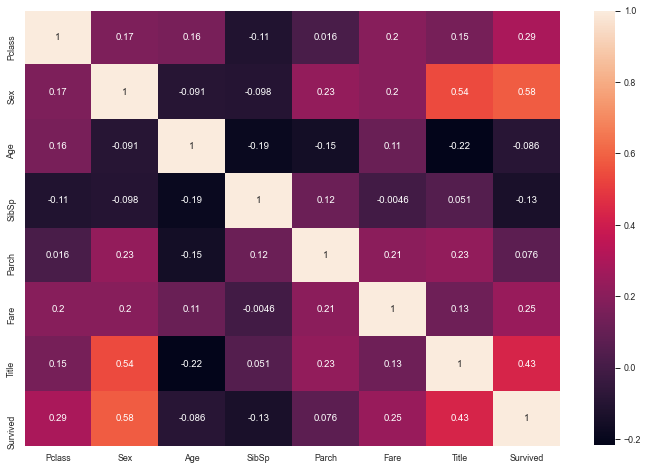

In [531]:
sns.heatmap(pd.concat([x_train, y_train], axis=1).corr(), annot=True)

Notice that "Title" and "Survival" are moderately correlated. As before, "Sex" and "Survival" are correlated, but with a slightly higher value. This is expected, because this is a correlation matrix of a smaller subset of the data (before we used all the data). 

Now, it's time to run our model again, and compare it with our previous stages:

In [532]:
models['Logistic Regression 3'] = evaluate(linear_model.LogisticRegression())
models['Logistic Regression 3']['Notes'] = "Added 'Title' feature. No resampling. No Tuning"

# Compare new model with previous best:
pprint(models['Logistic Regression 1'])
pprint(models['Logistic Regression 3'])

 Died: 
	 precision :  0.8085106382978723
	 recall :  0.8636363636363636
	 f1-score :  0.8351648351648351
	 support :  88
 Survived: 
	 precision :  0.7551020408163265
	 recall :  0.6727272727272727
	 f1-score :  0.7115384615384616
	 support :  55
 accuracy :  0.7902097902097902
 macro avg: 
	 precision :  0.7818063395570993
	 recall :  0.7681818181818182
	 f1-score :  0.7733516483516483
	 support :  143
 weighted avg: 
	 precision :  0.7879688700357393
	 recall :  0.7902097902097902
	 f1-score :  0.7876162299239222
	 support :  143
 AUC :  0.8022727272727272
 Classifier :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 Notes :   Minimal Features. No resampling to address class imbalance. No hyper-parameter tun

## Round 3 Performance:

We scored about .03 (3%) higher across the board on precision, recall, f1-score and accuracy! That's not a bad improvement. We will continue to strive for improvement.

# Round 4: More Advanced Imputation of Age:

In the previous rounds, we filled in missing Age data by just using the average. I want to try a more nuanced approach. Maybe we can guess missing Age data by title. For example, it was often the case that women in the era we are considering married younger. Therefore unmarried women going by the title "Miss" may have been, on average, younger than those going by the title "Mrs". We also know that it was more socially acceptable for young women to marry older men, meaning that passengers with the title "Mr" might be older than their female counterparts. Let's see if the data supports our idea.

If you are following along in this notebook, you may notice that we have already filled in missing Age data. In order to get to a state where we have 'Title' information but have _not_ filled in the missing age data, we will have to re-run some cells from Stage 1 and Stage 3. 

Run our previous steps in this order:

__1.__ Load the data (Stage 1)

__2.__ Add the 'Title' Feature (Stage 3)

__3.__ Map similar titles (Stage 3)

__4.__ Factorize the 'Title' feature (Stage 3)

__5.__ Factorize all other categorical data (Stage 1)

__6.__ Standardize the continuous data (Stage 1)


Once we have re-run these steps, our data will be in a state where the missing age data has not been filled in yet, but we have our title information:

In [545]:
train_df.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [546]:
train_df.Title.value_counts()

0    517
2    185
1    126
3     40
6     12
5      6
4      3
7      2
Name: Title, dtype: int64

Now that we are where we need to be with our data, let's visualize the distribution of our passengers by title and age: